In [1]:
import tensorboard as tf 
import numpy as np 
import matplotlib.pyplot as plt
import pathlib
import warnings
import glob
import PIL
import cv2 as cv
warnings.filterwarnings('ignore')

In [2]:
train_url = 'data/'
win_path = pathlib.Path(train_url)
win_path

WindowsPath('data')

In [3]:
train_path = list(win_path.glob('*/*.*'))
train_path[:5]

[WindowsPath('data/Angry/_0_10.png'),
 WindowsPath('data/Angry/_0_1006.png'),
 WindowsPath('data/Angry/_0_1008.png'),
 WindowsPath('data/Angry/_0_1011.png'),
 WindowsPath('data/Angry/_0_1015.png')]

In [4]:
len(train_path)

4572

In [5]:
# reading actual images

train_dict = {
    'angry': list(win_path.glob('Angry/*.*')), 
    'happy': list(win_path.glob('Happy/*.*')), 
    'sad': list(win_path.glob('Sad/*.*')), 
}

lbl_dict = {
    'angry': 0, 
    'happy': 1,
    'sad': 2,
}


train_image_dict = {
    'angry': [], 
    'happy': [], 
    'sad': [], 
}



In [6]:
# reading all images using the dictionary format 
train_x = []
train_y = []
for clas, imgs in train_dict.items():
    for img in imgs: 
        read_img = cv.imread(str(img))
        train_x.append(read_img)
        train_image_dict[clas].append(read_img)
        # storing lable 
        train_y.append(lbl_dict[clas])
print('data loading complete')

data loading complete


In [7]:
train_x

[array([[[195, 187, 164],
         [195, 187, 164],
         [195, 187, 164],
         ...,
         [239, 229, 212],
         [236, 226, 209],
         [232, 222, 205]],
 
        [[195, 187, 164],
         [195, 187, 164],
         [195, 187, 164],
         ...,
         [239, 229, 212],
         [235, 225, 208],
         [232, 222, 205]],
 
        [[195, 187, 164],
         [195, 187, 164],
         [195, 187, 164],
         ...,
         [238, 228, 211],
         [234, 224, 207],
         [233, 223, 206]],
 
        ...,
 
        [[173, 175, 154],
         [176, 177, 158],
         [179, 178, 158],
         ...,
         [201, 191, 173],
         [201, 191, 173],
         [201, 191, 173]],
 
        [[171, 172, 151],
         [173, 173, 155],
         [178, 177, 157],
         ...,
         [200, 190, 172],
         [200, 190, 172],
         [200, 190, 172]],
 
        [[171, 172, 152],
         [174, 174, 155],
         [177, 176, 155],
         ...,
         [199, 189, 171],
  

In [97]:
for img in train_x[:10]:
    print(img.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [85]:
# train_x
clean_train = []
for train in train_x:    
    try:
        if not train:
            print('yes')
    except: 
        # print('error')
        clean_train.append(train)
        
print('cleaning complete')    

yes
cleaning complete


In [86]:
clean_train

[array([[[195, 187, 164],
         [195, 187, 164],
         [195, 187, 164],
         ...,
         [239, 229, 212],
         [236, 226, 209],
         [232, 222, 205]],
 
        [[195, 187, 164],
         [195, 187, 164],
         [195, 187, 164],
         ...,
         [239, 229, 212],
         [235, 225, 208],
         [232, 222, 205]],
 
        [[195, 187, 164],
         [195, 187, 164],
         [195, 187, 164],
         ...,
         [238, 228, 211],
         [234, 224, 207],
         [233, 223, 206]],
 
        ...,
 
        [[173, 175, 154],
         [176, 177, 158],
         [179, 178, 158],
         ...,
         [201, 191, 173],
         [201, 191, 173],
         [201, 191, 173]],
 
        [[171, 172, 151],
         [173, 173, 155],
         [178, 177, 157],
         ...,
         [200, 190, 172],
         [200, 190, 172],
         [200, 190, 172]],
 
        [[171, 172, 152],
         [174, 174, 155],
         [177, 176, 155],
         ...,
         [199, 189, 171],
  

In [8]:
# conterting to numpy array
xtrain = np.array(train_x)
ytrain = np.array(train_y)

In [19]:
xtrain.shape

(4572,)

In [89]:
# xtrain = np.array(clean_train)

In [35]:
# xploring images.. 
# sample_image = xtrain[2]
# sample_image.shape

In [57]:
# label convertion 
label_converter = {0:'angry', 1:'happy', 2:'sad'}
label_converter

{0: 'angry', 1: 'happy', 2: 'sad'}

In [38]:
# def plot_image(index): 
#     plt.figure(figsize=(2, 2))
#     plt.imshow(xtrain[index])
#     plt.title(f'{label_converter[ytrain[index]]} : {ytrain[index]}')
#     plt.show()

# plot_image(13)

In [58]:
def plot_subplot(axis, samples, clas , index): 
    # plt.figure(figsize=(10, 10))
    axis.imshow(samples[clas][index])
    axis.set_title(f'{clas}')

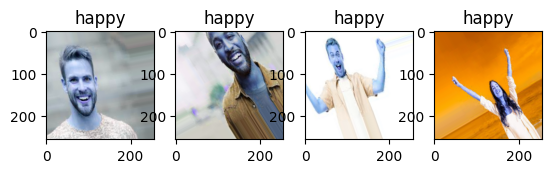

In [59]:
# subplot
fig, ax = plt.subplots(ncols=4)
for index in range(4):
    plot_subplot(ax[index], train_image_dict,  'happy', index)

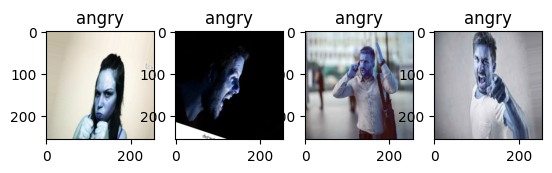

In [60]:
fig, ax = plt.subplots(ncols=4)
for index in range(4):
    plot_subplot(ax[index], train_image_dict,  'angry', index)

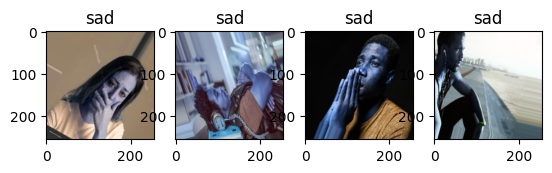

In [169]:
fig, ax = plt.subplots(ncols=4)
for index in range(4):
    plot_subplot(ax[index], train_image_dict,  'sad', index)

In [61]:
####.. basic exploration, transformation, and 
plot_data = {
    'angry': 0, 
    'happy': 1,
    'sad': 2
}
for clas, image in train_image_dict.items(): 
    print(clas, len(image))
    plot_data[clas] = len(image)

angry 1508
happy 1553
sad 1511


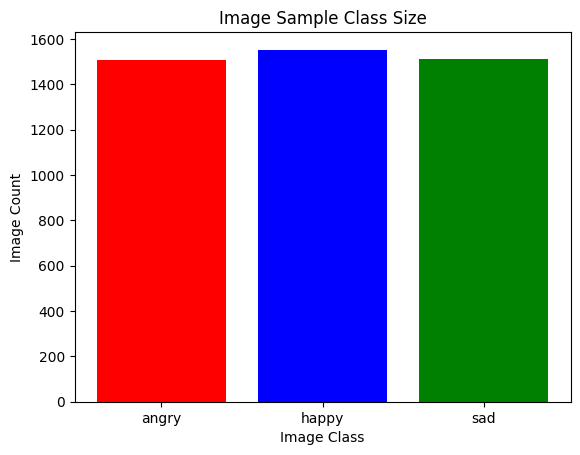

In [62]:
plt.bar(plot_data.keys(), plot_data.values(), color=['r', 'b', 'g', 'gold', 'cyan'])
plt.title('Image Sample Class Size')
plt.ylabel('Image Count')
plt.xlabel('Image Class')
plt.show()

In [63]:
# xtrain = np.array(clean_train)
# xtrain.shape

In [64]:
# scalling the image 
xtrain = xtrain / 255
xtrain[0]

array([[[0.76470588, 0.73333333, 0.64313725],
        [0.76470588, 0.73333333, 0.64313725],
        [0.76470588, 0.73333333, 0.64313725],
        ...,
        [0.9372549 , 0.89803922, 0.83137255],
        [0.9254902 , 0.88627451, 0.81960784],
        [0.90980392, 0.87058824, 0.80392157]],

       [[0.76470588, 0.73333333, 0.64313725],
        [0.76470588, 0.73333333, 0.64313725],
        [0.76470588, 0.73333333, 0.64313725],
        ...,
        [0.9372549 , 0.89803922, 0.83137255],
        [0.92156863, 0.88235294, 0.81568627],
        [0.90980392, 0.87058824, 0.80392157]],

       [[0.76470588, 0.73333333, 0.64313725],
        [0.76470588, 0.73333333, 0.64313725],
        [0.76470588, 0.73333333, 0.64313725],
        ...,
        [0.93333333, 0.89411765, 0.82745098],
        [0.91764706, 0.87843137, 0.81176471],
        [0.91372549, 0.8745098 , 0.80784314]],

       ...,

       [[0.67843137, 0.68627451, 0.60392157],
        [0.69019608, 0.69411765, 0.61960784],
        [0.70196078, 0

In [65]:
import tensorflow as tf 
from tensorflow import keras

In [66]:
cnn_model  = tf.keras.Sequential([
    # input 
    keras.layers.Input(shape=(256,256,3)),
    
   # cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),

    
   #dense
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(7, activation='sigmoid')
    
])


cnn_model.compile(
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='adam'
)

In [67]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [69]:
cnn_model.fit(xtrain, ytrain, epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).